In [15]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn import datasets
from sklearn.cluster import KMeans

In [ ]:
#import data 

In [3]:
df = pd.read_csv('Iris.csv')

In [4]:
df.head()

Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 6.5+ KB


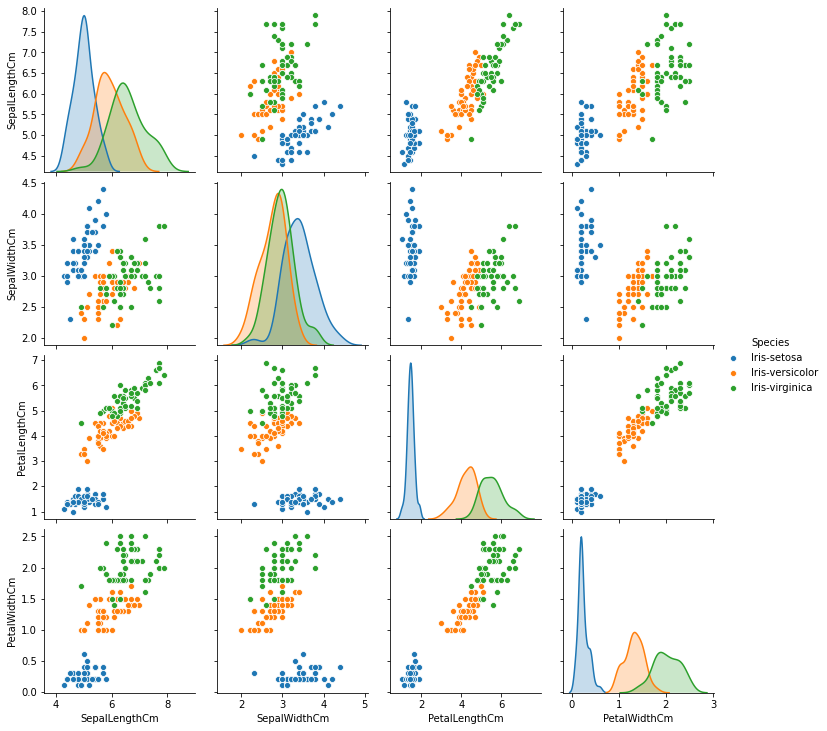

In [7]:
sns.pairplot(df.iloc[:,[1,2,3,4,5]],hue='Species')

In [12]:
x = df.iloc[:, [1, 2, 3,4]].values

In [13]:
x

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [ ]:
#elbow method

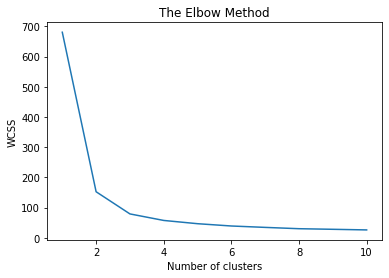

In [16]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
#from the above we can understand that optimum should 3

In [22]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 24)
pred_mean = kmeans.fit_predict(x)

In [ ]:
#scatter plot against SepalLengthCm and SepalWidthCm

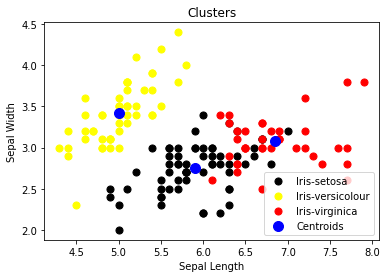

In [34]:
plt.scatter(x[pred_mean == 0, 0], x[pred_mean == 0, 1], s = 50, c = 'black', label = 'Iris-setosa')
plt.scatter(x[pred_mean == 1, 0], x[pred_mean == 1, 1], s = 50, c = 'yellow', label = 'Iris-versicolour')
plt.scatter(x[pred_mean == 2, 0], x[pred_mean == 2, 1], s = 50, c = 'red', label = 'Iris-virginica')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 100, c = 'blue', label = 'Centroids')
plt.title('Clusters')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.legend()
plt.show()data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAYMAAAEWCAYAAACEz/viAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjMuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/d3fzzAAAACXBIWXMAAAsTAAALEwEAmpwYAAA+1UlEQVR4nO2de3hU1bnwf28gFchFPpVyVYOKoQIhXCs1XnuOFfRgbdHYqkCPghZaLfZUQk+/1vrVA57aaq2xHqFV8UrF4sEWrFovgNWWW8ALhIDGU0nwggeYIGhI3u+PPQnJMDN7J9mzZ0/y/p5nPzOz1tprvXtnMu9ea70XUVUMwzCMrk1WugUwDMMw0o8pA8MwDMOUgWEYhmHKwDAMw8CUgWEYhoEpA8MwDANTBobRChG5WUQeTrcchhE0pgyMLomIfFNE1olInYjUishKESnxqe8CEVER6e5Hf4YRBPZlNbocInIjUAZcB/wZ+Ay4ALgY2J9G0QAQke6qeijdchhdC5sZGF0KETkauAWYrap/UNX9qlqvqk+r6g9i2p4jIu/FlFWLyD9F34+Pzi72icj7IvLLaLNV0dc90ZnHhGj7fxWRLSLyvyLyZxE5sUW/KiKzRaQKqBKHO0Tkg2j/r4vI8BTdFsMwZWB0OSYAPYBlPvT1K+BXqpoPnAz8Plp+VvS1t6rmquqrInIx8EPga0AfYDXwWEx/XwW+CJwGnB/t51TgaOAyYLcPMhtGXEwZGF2NY4GPfFqGqQdOEZHjVLVOVV9L0vY6YL6qbomO/R9AccvZQbT+Y1U9EO07DxgKSPS8Wh9kNoy4mDIwuhq7geN82ty9GufJfauIrBWRi5K0PRH4lYjsEZE9wMeAAANbtPlH0xtVfQG4GygHPhCR+0Qk3weZDSMupgyMrsarwKc4SzJu7Ad6NX0QkW44SzwAqGqVqn4D+DxwG7BURHKAeKGA/wFcq6q9Wxw9VfWvLdq0Ok9V71LVMTjLRqcCrfY0DMNPTBkYXQpV3Qv8GCgXka+KSC8RyRaRiSLynzHNtwE9RORCEckGfgQc1VQpIleKSB9VbQT2RIsbgQ+jrye16OteYJ6IDIuee7SIXJpIThEZJyJfjI67HzgY7dMwUoIpA6PLoaq/AG7E+XH/EOep/TvAUzHt9gKzgEXATpwf5ZbWRRcAb4pIHc5m8uWqekBVPwFuBV6JLgudrqrLcGYPj4vIPuANYGISMfOBhcD/Au/iLG/9vCPXbRjJEEtuYxiGYdjMwDAMwzBlYBiGYZgyMAzDMAhAGYhINxHZKCJ/jFM3XUQ+FJGK6HFNquUxDMMwjiSIQHU3AFtwrCPisURVv+O1s+OOO04LCgr8kMswDKPLsH79+o9UtU+i+pQqAxEZBFyIY2Z3ox99FhQUsG7dOj+6MgzD6DKIyLvJ6lO9THQncBPJnWW+LiKbRWSpiBwfr4GIzIxGh1z34YcfpkJOwzCMLk3KlEE0TssHqro+SbOngQJVLQKeAx6M10hV71PVsao6tk+fhLMcwzAMo52kcmZwBjBZRKqBx4HzYtMJqupuVf00+nERMCaF8hiGYRgJSJkyUNV5qjpIVQuAy4EXVPXKlm1EpH+Lj5NxNpoNwzCMgAk87aWI3AKsU9XlwPUiMhk4hBPSd3rQ8hiZTgRYAlQBQ4BSnDQAhmG0hYyLTTR27Fg1ayLDYQ0wCcc+YT+QgzPZXQH4ktveMDoNIrJeVccmqjcPZCNDieAoggiHc9jvb1Felya5DCMzMWVgZChLSGyx3BitNwzDK6YMjAylisMzglj2A9sDlMUwMh9TBkaGMgRnjyAeOcApAcpiGJmPKQMjQykl8dc3K1pvGIZXTBkYGUoejtVQHodnCDktynPTJJdhZCaB+xkYhn+UADU4m8XbcZaGSjFFYBhtx5SBkeHkAlenWwjDyHhsmcgwDMMwZWAYhmGYMjAMwzAwZWAYhmFgysAwDMPAlIFhGIaBKQPDMAwD8zMw0oolpjGMsGDKwEgT8RLT3IglpjGM9GDLREYasMQ0hhE2TBkYacAS0xhG2DBlYKQBS0xjGGHDlIGRBiwxjWGEDVMGRhqwxDSGETZMGRhpwBLTGEbYMNNSIwGp9gGwxDSGESZMGRhxCMoHwBLTGEZYsGUiIwbzATCMrogpAyMG8wEwjK6IKQMjBvMBMIyuiCkDIwbzATCMrogpAyMG8wEwjK6IKQMjBvMBMIyuiJmWGnHoTD4AljPBMLyQcmUgIt2AdcBOVb0opu4oYDEwBtgNlKpqdaplMrzQGXwALGeCYXgliGWiG4AtCequBv5XVU8B7gBuC0Aeo0tg/hKG0RZSqgxEZBBwIbAoQZOLgQej75cCXxYRSaVMRlfB/CUMoy2kemZwJ3ATif8rBwL/AFDVQ8Be4NjYRiIyU0TWici6Dz/8MEWiGp0L85cwjLaQMmUgIhcBH6jq+o72par3qepYVR3bp08fH6QzOj/mL2EYbSGVM4MzgMkiUg08DpwnIg/HtNkJHA8gIt2Bo3E2kg2jg5i/hGG0hZQpA1Wdp6qDVLUAuBx4QVWvjGm2HJgWfT8l2kZTJZPRlTB/CcNoC4H7GYjILcA6VV0O/BZ4SES2Ax/jKA2jU1ADzAO2AkOB+cCAgGXoTP4ShpFaJNMexMeOHavr1q1LtxhGUu4BZscpLwdmBSyLYRgAIrJeVccmqrdwFIbP1BBfERAt3xWgLIZheMWUgeEz81zqywKRwjCMtmHKwPCZrS71lYFIYRhG2zBlYPjMUJf6wkCkMAyjbZgyMHxmvkv9gkCkMAyjbZgyMHxmAI7VUDzKgX4BymIYhldMGRgpYBZQi+NPeHr0tRYzKzWM8GLJbbok24DpwDvAYOAB4FSfx+gX7TfVWPIaI+REIrBkCVRVwZAhUFoKeW38jvrRhwvmdNbluBEndUQsc4BfBixLR4mXvCYLS15jhIY1a2DSJGhshP37IScHsrJgxQoo8fgd9aMP3J3OTBl0KbaR3JpnO3ByQLJ0lAhOBPRInLo8HOc3CzthpJFIBAYOdF5jycuDmhrIdfmO+tFHFPNANlow3aV+ahBC+IQlrzFCzpIlztN8PBobnfog+vCIKYMuxTsu9dVBCOETlrzGCDlVVc6yTjz274ftHr6jfvThEVMGXYrBLvUFQQjhE5a8xgg5Q4Y46/vxyMmBUzx8R/3owyOmDLoUD7jULw5CCJ+w5DVGyCktdTZ645GV5dQH0YdHTBl0KU7FsRqKxxwyZ/MYLHmNEXry8hyLn7y8w0/3OTmHy71s/PrRh0fMmqhLsgn4GvA+0Bf4AzCyjX242fcHZf9fhyWvMUJNXZ2z0bt9u7OsU1ra9h9xH/ow01IjBj9s8936MPt/wwgbbsrAPJC7FBGcH+mWNstNlgqT8Gab79ZHpQ9jGIYRNLZn0KXwwzbfrY8yH8YwDCNoTBl0KfywzXfro9KHMQzDCBpTBl0KP2zz3foo9GEMwzCCxpRBl8IP23y3Phb4MIZhGEFjyqBL4Ydtvlsf/X0YwzCMoDFrIl8JS2z9ZHKU4Fj0dMQ2360PP8YwDBcCiPHflTA/A98Ii219WOQwjBTiU4z/roQ5nQVCWGLrh0UOw0ghPsb470pYPoNACEts/bDIYRgpJMAY/10JUwa+EJbY+mGRwzBSSIAx/rsSpgx8ISyx9cMih2GkkABj/HclTBn4Qlhi64dFDsNIIQHG+O9KmDLwhbDE1g+LHIaRQgKM8d+VMD8D3wiLbX0JsB6YhpPTuAB4EGcJqYkaYB6wFRgKzAcGxPQThM9EWPwyjIyjpMSxGupongCjmZSZlopID2AVcBSO0lmqqj+JaTMd+DmwM1p0t6ouStZvOE1Lw8Q9wOw45eXALA/1EIyvgvlDGEaQdNjPQES+BtwGfB6Q6KGqmu9yngA5qlonItk4//03qOprLdpMB8aq6nc8Xo8pg6TU4PgZJGIjMCpJfS3Oj3KqfRXMH8IwgsYPP4P/BCar6tGqmq+qeW6KABxtoap10Y/Z0SOzPNwyjnku9V93qS8jGF8F84cwjLDhRRm8r6pb2tO5iHQTkQrgA+A5Vf1bnGZfF5HNIrJURI5P0M9MEVknIus+/PDD9ojSRdjqUv++S30lwfgqmD+EYYSNhMpARL4WXSJaJyJLROQbTWXRcldUtUFVi4FBwHgRGR7T5GmgQFWLgOdwdjrj9XOfqo5V1bF9+vTxMnQXZahLfV+X+kKC8VUwfwjDCBvJZgb/Ej3ygU+A81uUXdSWQVR1D/AicEFM+W5V/TT6cREwpi39GrHMZ8eOk5g1627y8/eQldVAfv4eZs26mx07TgKedDl/AcH4Kpg/hGGEjYSmpar6LQAROUNVX2lZJyJnuHUsIn2AelXdIyI9gX/G2Yhu2aa/qtZGP04G2rUcZTisXDmAKVO2Ul+v1Nd/DoBI5GgWLZrBgw/OZOnSbCZOLCexNVG/6PsVJLb08WNjt8nvIZVjGIbRFrxYE21Q1dFuZXHOK8JZ9umG81/+e1W9RURuAdap6nIRmY+jBA4BHwPfVtWkC99mTRSfHTugqAg++SRxm169YPNmOPnkXTibxZU4S0MLOKwImqgj9T4TQYxhGAa4WxMlnBmIyATgS0AfEbmxRVU+zg98UlR1M3HsGFX1xy3ez8PdBCaD8MOJyotD2JH84hdQX5+8TX093HEH3H13Do4tf18Sr99r9Ghs8b4teLmOXODqNvYbPJFIhCVLllBVVcWQIUMoLS0lr61JVLwkYrFkLUY6UdW4B3A28BMc4/OftDhuBIYkOi/Vx5gxYzScrFbH6jZHHVFzop9Xt6GPco1/2eWuZ+blqYL7kZ9f70HOjl5L+68jbKxevVrz8vI0JydHAc3JydG8vDxdvboNf9fVq50/UE6O80fIyXE+t+zDSxvD6AA4KzIJf1u9LBOdqKrvplIhtYVwLhP54UTl5jBWy5FLOYfJynJ+7t3IymqkoSHexK5JTqVj19Kx6wgTkUiEgQMHEomTRCUvL4+amhpy3cIfeEnEomrJWoyU026nMxF5WkSWA78WkeWxR0qkzVj8cKJyWy0rS1rr9bciNzfejzwclrOj19Kx6wgTS5YsoTFBEpXGxkaWeEmi4iURiyVrMUJAMtPS24FfAO8AB4CF0aMO2JF60TIJP5yo3BzGKpPWXnklZGcn3zTIzv6Mq656KEFtk5wdvZaOXUeYqKqqYn+CJCr79+9nu5ckKl4SsViyFiMEJFQGqvqyqr4MnKGqpar6dPT4JnBmcCJmAn44Ubk5jBUmrf3+9yE7O9ETvUN2dgNz5vxXgtomOTt6LR27jjAxZMgQchIkUcnJyeEUL0lUvCRisWQtRgjwsmewBbhQVd+Ofh4MrFDVLwQg3xHYnkFiVq7czZQpPaivz272MwBnRpCdXc/SpXuZOHGoi5y2Z9CE7RkYnQk/AtXNAV4SkZdE5GUcT+Lv+SRfJ8GPpDIDcBy/4tHSISwxEycey+bNy5g58z7y8/dGPZD3MnPmfWzevIyJEwd4kLOj19Lx6wgLeXl5rFixgry8vOYZQk5OTnO5qyJwOnFPxGLJWowQ4CmfgYgcxeH5/1Y9HEIicMI5M2jCDycqLw5hbmwHpnI4uc1iWi/v1MYZo39MHx29Fj+uIxzU1dWxZMkStm/fzimnnEJpaak3RdC6E9dELJGqKmqnTeOo6mo+LSig/4MPkjdkSIIOU0RNDcybB1u3wtChMH8+DHD3czHCT7vzGYjIear6QqKgdKr6B59kbBPhVgZhwC1pjCWVCSOb77mHwbNnIzgqtw5nwe6d8nKKZs1KfrJf3HMPzI4TqqS8HIKSwUgZHVEGP1XVn4jI/XGqVVX/1S8h24Ipg2S47V00PaVbUpkwEampgYED4/qqRwCprSW3X4pnVVEZElJbC6mWwUgpHdkzWCYioqrfinOkRREYbrj5CJS51Js9ezqomDcPSVAnwMayAHwz5rn4hwQhg5FWEsYmwgkpfZKIrAf+CrwCvKqqibyWjLTj5iNQ6VJv9uzp4NDWrQnnY7lAQ2UAvhlbXfxDgpDBSCvJ/AzG4iSluRX4FLge2C4im0TknoDkM9qEm49AoUu92bOng+5Dh1KXoK4O6FYYgG/GUBf/kCBkMNKKV2uiHOB04AwcM5UsVT0pxbLFxfYMkmF7BpmI7RkYQdCR2ETfFJG7RWQNsBwnOc3rQEm6FIHhhpuPQH+XelME6SBvwADeKS8nAs0zhDocRfBOeXnqFQE45qPlCfxDystNEXQBklkTRXAeJe8FVqnqtiAFS0TqZgZ+5CJw66N9uQrajpsfgSWVaYkv+Qp8oG7XLjaWldFQWUm3wkJGLVjQShFEamqomDePQ1u30n3oUIrnzyevpQ+AH/kQdu1yNosrK52loQULjlQEbuN4kCOwHBFGM24zg2T5DLoBo4HvAI8C64E/Av8OnJcsLnYqj9TkM/AjF4FbH0HF+PfjWroOvuQrCIBN5eW6DzQSTUwRAd0Huqk8+v0JKh+C2zge5AgsR4TRCjqaz6CFVukLXIoTimKwqrpmO0sF/s8M/Igr5NbHeuDUJOf7Fa/Hj2vpOvgSeygAXPcUqqrIHT069bGN3OIsNc0mksgRUQ0m3lMI/m5hoyN7BkUicp2ILBaR7cBaHBfVXwNf9F/UdOFHLgK3Pqa5nO+XDbcf19J18CVfQQC4+SHUTJ0aTD4Et7wLZWWucgSWI8JoM8n8DB7AiV2wEviRqv5PIBIFjh+5CNz6qHY53y8bbj+upevgS76CAHDzQziqujqYfAhueRcqK13lqGpsDCZHhNFmkvkZjFbV61X1sc6rCMCfXARufRS4nO+XDbcf19J18CVfQQC4+SF8WlAQTD4Et7wLhYWucgSWI8JoM573DMKC7Rl0RA7bM2iJ7Rm0VRDbM8hk/Mhn0MnxIxeBWx9DCCbGvx/X0nXwJV9BALj6IZxySjD5ENzyLvTv7ypHYDkijDZjM4Nm/LC9d7Pv9xLj381XYRswHSc19WCcrZ3YWYf5EbQFX/IVBEDd9u3UTJ1Kj+pqDhYUMGDxYkcRNDdwz5ngRu22baycPp1u77xDw+DBTHzgAfqfGvP9chtn40aYMgXefx/69oWlS2HUqJgugskRYRymI34GT+N4Hsc9ktmrpvJIjZ+BHwThqzBH49+WOR0X3wg3AdjVPzlnju6N8WXYC/rknMTfr+3bVb/9bUcUEdW8zx3Qb3O3buckR86mI0kfRjDQXj8DETk7mZZR1Zfbo506SjhjEwWx7/Ayjg9gIrYDJ7tKamQgAayR127bRk5hIflx6vYBB7Zvp+/Jrb9fK1c6E4D6eudoIpvPyKaepUxhIs8crti+HU6272i6aPeegaq+nOxIjbiZShC+ClNczp/qYQwjIwnArn7l9OkJfwyygD9Nbf392rHDUQSffNJaEQDU8zk+IYcpLGUHLcKYTbXvaJhx3UAWkSEislRE3hKRt5uOIITLHILwVXjf5fxqD2MYGUkAdvXd3nknqS9D9+rqVmW/+MWRSiCWerK5gzmHC2L6MMKFF2ui+4HfAIeAc3Gyqz+cSqEyjyB8Ffq6nF/gYQwjIwnArr5h8OCkvgyHCgpalT38sBdl8Dke4qrDBTF9GOHC1Zoous40RkReV9URLcsCkTAG2zNIhO0ZdFpCuGeQleXsDLuRRQMNTYEObM8grfjhZ/CpiGQBVSLyHRG5BLNTjCEIX4VR0HLK3Yo5mCLoxARgV9//1FN5fs4c9tHal2Ef8PycOUdsHnsdMreptzlzTBGEHC8zg3HAFqA38P+Ao4H/VNXXUi5dHMI5M2jCD/t+tz524GwWV+MsDS3GFEEXIQC7+vd37OBPU6fSvbqaQwUFXLh48RGKAGDWLFi0KPlSUTafMbPvcu5+ZZQpghDgNjNIFqgOAFVdG+0oC7heVeOtY8QbuAewCjgqOs5SVf1JTJujcH7NxgC7gVJVrfbSf9vwkrjGj+Q2ucDVHZLUeRZbhZMApwaYSGtl8HngWy3k/HycPvy4lo7hR/KSmpoa5s2bx9atWxk6dCjz589nwIDWyYCCGMfLGF5k7TC5uXB1ku/Xtm0wfTq88w4MHgwPPAAxDmNu19K3Z0/+9ZRT4NAhR+H07HnkOJEI3x+0ggf1Eur5XEJxsnt9jjmvTGnfs4qXxDVhSG6TKXJ6IZkTQnTWMBYn3WV19NgEjPFwngC50ffZwN+A02PazALujb6/HFji1m/bnc68OIOFJSGMWwKczLgWP5KXlJeXK3DEUV5+OBlQEON4GcOLrClnzpzWTl5xnL1cr6W8PH4fLa+jhfPbCi7QXtRpNp+2ap6drdqrl+qKFe28Fi8OdmFIbpMpckbBxenMizLYDJzZ4nMJsNntvJg+egEbgC/GlP8ZmBB93x34iOjSVaKjbcpgnzo/hPG6ylPViMc2QbAzgQxNR1VGXMu+ffs0Ly8v7o9jXl6eRiLuMuzcuTPu+U1HbW1tIONUVVW5juFF1pRTWRn/R7zp2L7d/X5t25a8j9pa1X37nB+yFuXbOUln82vNZ49mSaPm56vOnu14JreLOGM0H3l5qpGItzapJlPkbIGbMvCygdygqqubPqjqGhwzU1dEpJuIVAAfAM+p6t9imgwE/hHt9xCwFzjWS9/e8OIMFpaEMPNc6qeSCdfiR/KSefOS34uysrJAxpk6darrGF5kTTnTpyevnzrV9X7VTJuWvI+ysrjObyfzNnfzXfbmDKRh4e/YuxfuvrsDWwReHOzCkNwmU+RsA657BsDLIvJfwGM4TxKlwEsiMhpAVTckOlFVG4BiEekNLBOR4ar6RluFFJGZwEyAE044oQ1nenEGa/TQJgi2utRXkwnX4kfCmK1bk9+LyspK+vbtm/JxqqurXcfwImvKeeed5PXV1a5/lx5uDmGVlU7QuVQnlfHiYNfYmP7kNpkiZxvwMjMYiRMW8yfAzcAXcOwcfwHc7mUQVd0DvAhcEFO1EzgeQES641gq7Y5z/n2qOlZVx/bp08fLkFG8OIOFJSHMUJf6AjLhWvxIXjJ0aPJ7UVhYGMg4BQUFrmN4kTXlDB6cvL6gwPV+HXRzCCssDCapjJcxwpDcJlPkbAvJ1pA6cgB9gN7R9z2B1cBFMW1m03oD+fdu/dqeQbivxfYMutaege9r4JmyFp8pcrYAHzaQ+wK/BVZGP58GXO3hvCJgI84G9BvAj6PltwCTo+97AE/grF/8HTjJrV+zJgr/tZg1UdewJlJIjXVMpljpZIqcUdyUgRens5U48Yn+XVVHRpdzNmo0NEXQtM/pzIszmFtimqBwS4Dj5VrSn9zGj+Ql27dvZ+rUqVRXV1NQUMDixYuPWP6pra2lrKyMyspKCgsLWbBgAf37t+3vtmvXriP66Nfv8D33MoabrJ78IVzs0V372LHDiQxaXe3EAVq8+IidXNdr2bXL2SxuSmG5YAH0i0nAFERSGS9juLUJwr7fDzkDot3JbZoOYG30dWOLsgq381J1pCa5Tfqfpo3WeHki92NmEIQcnuR0eYL041qDuF+hIURP5GEBH5aJXsIx99wQ/Xw68LLbeak6/FcG6V9nN1rjZT/Ajz2DIOSoqalxl9NlbXmflz58uJZOQ8jW6sOCmzLwYk10I06qy5NF5BWc8BHf9XBehpB+23yjNV58CPzwMwhCjrKyMnc5XezRN3rpw4dr6TRkmH1/WPASm2hDNAVmIU6IiUpVdYlknkn4kZjG8BMvvgqNjY0d9jMIQo7Kykp3OV3s0Ru89OHDtXQaAkgG1BlJODMQkXEi0g9AHe/gMcCtwC9E5JiA5AuA9NvmG63x4kPgh59BEHIUFha6y+lij97NSx8+XEunIdPs+8NCovUjnFhCx0Tfn4UTQvPrOGGslyZbe0rlYXsGnR/bM7A9gw5hewZxoQN7Bt1U9ePo+1LgPlV9UlX/L53qcdmPxDSGn+Tl5bFixQry8vKan2ZzcnKay3Nzcz21CYMc/fv3d5fTJXlNnpc+fLiWTkMAyYA6Iwn9DETkDaBYVQ+JyFZgpqquaqpT1eEBytlM6pLbpN8232iNF/v+qqoqpk2b1mzf/+CDDzJkyJDmej/yHXjxmXCTw8u1RGpr2VhWRkNlJd0KCxm1YAF5LdrUVVVRM20aPaqrOVhQwIAHHyS3jdfqh/+HH/c0ELzY9wfhixCSfAbt9jMA/h14BfhvHE/iJsVxCvBKsulGKo/U+BkYYcMPz9+g7Or9kKOj3sFBXWun8lUIizd1QNARPwMcn4JLgJwWZacCo5Odl8rDlEHnx8v6th9xhfzADzk6GjdoX0DX2qn2HcISZylA3JRBUj8DVX1NVZep6v4WZds0Sdhqw+goXmzi/chFAE4Eh1mzID8fsrKc11mznHIv+CFHR3MN1Hq81o7SqXwVgvBFyDB/By9OZ4YRKF5s4v3IRbByJRQVOYndIxHnkS0ScT4XFcHKle6y+iFHR3MNHOVhDD/oVL4KQfgiZJi/gykDI3R4sYnvaC6C/PxRTJkCn3wC9TEulPX1TvmUKe4zBD9yInQ018CnHsbwg07lqxCW3AxhItkaUhgP2zPo/ASxZ3DNNZ9qdnbSpXjNznby+SbD9gxszyCtY7QBOhqoLmyHKYOuQaqtiRL9j8Ye+fnuspo1kVkTpXUMj7gpA9d8BmEjdX4GRkvCYEvuxTbfLRfBmjVruOSSS9izZw+9e/dm2bJllJSUkJXl/Jq6kZUFe/a43ws3ObzY97te7/btR+YraLHU4IcPgReCGicQwpKbIQA6nM8gbIfNDFJPGJ7+/JDhsssui/vEftlll3meGeTk1IfjiTtET5hGZoLNDIy2EIlEGDhwIJFI5Ii6vLw8ampqUv4U6IcMGzZsYMyYMQnrL7vsQ5YtO+6IzeOWZGcrsJD6+mvbLYcXXK+3spLcwkLH1OnIBlBTYyEWDFfcZgZmTWS0Igy25H7IcOmllyatf+21y8jOTt6HyCG6d/91h+Twgtv1biwryyh7dSMzcc1nYHQtwmBL7ocMu3btSlq/e/ffWbrUMR+tr29tXpqd7RyTJj3E0qVvdEgOL7hdb0NlZdrs1evr63nvvfc4ePBgysYw/KVHjx4MGjSIbLennRhMGRitaLIlj/fjFJQtuR8y9OvXj7fffjtp/cSJsHkz3HEHPPSQs8+XmwtXXQVz5sCLLzaycmXq74Xb9XYrLIQ33oivEFJsr/7ee++Rl5dHQUEBIpKycQx/UFV2797Ne++9x+DBg9t+ciYdtoGcWsJgS+6HDOvXr09q/79p06ZA5PCC6zg1NWmzV3/rrbe0sbExZf0b/tPY2KhvvfXWEeX4kAPZ6EKEIe69HzKMHj2ayy67LG7dZZddRlFRUSByeMF1nP790xqf32YEmUV7/15mTWTEJQhbcjdfBi8yuPXx6quvMnny5GY/g+XLlzNhwoQ2yenpXvgQs951nDTYq2/ZsoUvfOELKR2j09PQAB9/DJ9+CkcdBcccA926pXTIeH838zMwQokffgRufQTmL9GJfQDiLTckY9++fbpw4UK96aabdOHChbpv374Oy5CTk5OwbsKECR3uPxG33nprxzvZt091/XrnWLv28Hsf7ksy2rNMZDMDI3D88CNw66PJizfl/hKRCAwc2Gl9ANoyM1izZg2TJk2isbGR/fv3k5OTQ1ZWFitWrKCkpKTdMuTm5lJXV9eq7NChQ3Tvnlr7l3jjtomGBti0Kb5ZcFYWjByZshlCe2YGtmdgBI4ffgRufZSVlQXjL5FhMetTRSQSYdKkSUQikWarqP379zeXd+hHNcpLL73EmWeeyeTJkznttNMAmhV6bW0tZ511FsXFxQwfPpzVq1cfcf6bb77J+PHjKS4upqioiKqqKgAefvjh5vJrr72WhoYGysrKOHDgAMXFxVxxxRUA/PKXv2T48OEMHz6cO++8s/kaL7zwQkaOHMnw4cObv1e33HIL48aOZfhllzHz1luJ+9D98cdHlqURUwZG4PjhR+DWR2VlZTD+EhkWsz5VBOWsuGHDBn71q1+xbdu2VuWPPvooX/nKV6ioqGDTpk0UFxcfce69997LDTfcQEVFBevWrWPQoEFs2bKFJUuW8Morr1BRUUG3bt145JFHWLBgAT179qSiooJHHnmE9evXc//99/O3v/2N1157jYULF7Jx40aeeeYZBgwYwKZNm3jjjTe44IILAPjOd77D2qef5o3HH+fAp5/yx1jl1Njo7CGECFMGRuD4ERffrY/CwsJgYu9nWsz6FBGUs+L48ePj2s+PGzeO+++/n5tvvpnXX389blDFCRMm8B//8R/cdtttvPvuu/Ts2ZO//OUvrF+/nnHjxlFcXMxf/vKXuP4pTQEPc3JyyM3N5Wtf+xqrV69mxIgRPPfcc8ydO5fVq1dz9NFHA/Diiy/yxYsvZsTll/PCunW8GdtnVpazmRwiTBkYgVNaWkpWVvyvXlZWFqWlpR3uY8GCBR0ewxOlpc4/dvyBnPouQFCJbxKNcdZZZ7Fq1SoGDhzI9OnTWbx4McuWLaO4uJji4mLWrVvHN7/5TZYvX07Pnj2ZNGkSL7zwAqrKtGnTqKiooKKigsrKSm6++WbP8px66qls2LCBESNG8KMf/YhbbrmFgwcPMmvWLJY++SSv//73zPjqVzn42WdHnnzMMe28C6nBlIEROH7Y77v10b9//2D8JZps/dPkAxAW/FDwHeHdd9+lb9++zJgxg2uuuYYNGzZwySWXNP/Ijx07lrfffpuTTjqJ66+/nosvvpjNmzfz5S9/maVLl/LBBx8A8PHHH/Puu+8CkJ2dTX00TsmZZ57JU089xSeffML+/ftZtmwZZ555JjU1NfTq1Ysrr7ySH/zgB2zYsKE5dMdxfftS178/S194AZps/7OynGPIkJSbl7YVC0dhpIWSkhJqamo65Mvg1ocfY3gUxLEaCkHM+nTRpGQTWROl2lnxpZde4uc//znZ2dnk5uayePHiI9r8/ve/56GHHiI7O5t+/frxwx/+kGOOOYaf/exnnH/++TQ2NpKdnU15eTknnngiM2fOpKioiNGjR/PII48wffp0xo8fD8A111zDqFGj+POf/8wPfvADsrKyyM7O5je/+Q29e/dmxowZDB8+nH79+jGupATy86Ffv8D8DNqDmZZmGH4knQlD4hovcniRMyzX4gc1NTXMmzePrVu3MnToUObPn8+AAQOCFSLGeW7LhAl8Ydgwz6d3qsQ3GUyonM6A44EXgbeAN4Eb4rQ5B9gLVESPH7v125WdzoJw1AoKPxzGwnItfuCWOjMQ4jjPvfXMMyl3kDL8pz1OZ6lUBv2B0dH3ecA24LSYNucAf2xLv11VGfgRNC0MQei8yFFTU9PxJPIZlJx9586dSYPq1dbWpl6IBMnb31q50vGYPXQo9TIYvhGqQHWqWquqG6LvI8AWYGCqxuvsBOGoFUTiGi9yeHEYC8u1+MG8efOS1peVlaVeiGTOcxA6BynDfwLZQBaRAmAU8Lc41RNEZBNQA/ybqr4Z5/yZwEyAE044IYWShpcgHLWCSFzjRQ4vDmNNm5TJ2mQKW7duTVpfWVmZeiGSOc+F0EHK8J+Um5aKSC7wJPA9Vd0XU70BOFFVRwK/Bp6K14eq3qeqY1V1bJ8+fVIqb1gJwlEriMQ1XuTw4jAWlmvxg6FDhyatLywsTL0QyZznQuggZaSAZGtIHT2AbODPwI0e21cDxyVrY3sGtmdgewYpwPYMOhWh2jMQJ8PCb4EtqvrLBG36RdshIuNxZiq7UyVTJhOEo1ZQJoB+OIyF5Vr8YMCAAZSXl8etKy8vp1+/fqkXIpHznEgbHaQiwCJgbvQ1TjTXNpLsb/mlL32pw/13hJqaGqZMmdKuc8855xzCZCafMj8DESkBVgOvA007Uz8ETgBQ1XtF5DvAt4FDwAGcGcRfk/Xb1f0MamtrKSsraw7RvGDBAvr379+mPsJiC15VVcW0adOorq6moKCABx98kCFDhrRJzrBcix/s2rXriL9tIIqgJTEJdLacfnob/AzWAJNw/t33Azk4z3crgMwLYZ3q8c455xxuv/12xo5NbPrvhXiyhcrPIFVHV10mUjW7eiN4vCe32aeqeRr/3zZPVdu/bNeU3ObFF1/UkpIS/Zd/+RcdMmRIq7qamho988wzdeTIkTps2DBdtWpVqz727NmjJ5xwgjY0NKiqal1dnQ4aNEg/++wz3b59u37lK1/R0aNHa0lJiW7ZskVVVadNm6bXXnutjh8/XufMmaMvvfSSjhw5UkeOHKnFxcW6b98+feedd3TYsGGqqnro0CH9/ve/r8OGDdMRI0boXXfdpaqqzz//vBYXF+vw4cP1W9/6lh48eFBVVc8++2xdu3atqqo++uijOnz4cB02bJjedNNNR1y7quoTTzyh06ZNiytbLKHyM0jV0VWVga2RG+nAuzJYqKo5Gv/fNkdVF7VbhpbKoFevXvr2228fUXf77bfrz372M1V1fpTjZVibPHmyvvDCC6qq+vjjj+vVV1+tqqrnnXeebtu2TVVVX3vtNT333HNV1fnBvfDCC/VQdL/koosu0jVr1qiqaiQS0fr6+lbK4J577tGvf/3rWl9fr6qqu3fv1gMHDuigQYO0srJSVVWvuuoqveOOO1T1sDLYuXOnHn/88frBBx9ofX29nnvuubps2bJW16d6pDJoKVssodozMPzF7OqNcFOFszQUj/1A+kNYl5aWNv+fPP7445SWllJXV8df//pXLr300ubkNrW1tc3nXHrppXSL7pecccYZ3Hjjjdx1113s2bPniKWZ559/nmuvvba5/JhjjqGyspLBgwdz6qmnAjBt2jRWrVrV6ry1a9dyzjnn0KdPH7p3784VV1xxRJt4tJTND0wZZAhh8RHwg1DY1Rs+MwRnjyAeOUD6Q1hPnjyZZ555ho8//pj169dz3nnn0djYSO/evZujm1ZUVLBly5a445WVlbFo0SIOHDjAGWec4fo99gNpinYKzdFQ48nmB6YMMgSzqzfCTSmJf06yovWpw0sI69zcXMaNG8cNN9zARRddRLdu3cjPz2fw4ME88cQTgLNsvmnTprhj7NixgxEjRjB37lzGjRt3hDL453/+Z/7rv/6LQ4cOAU447MLCQqqrq5sf1h566CHOPvvsVueNHz+el19+mY8++oiGhgYee+yx5jZ9+/Zly5YtNDY2smzZMl/vWSymDDKEdMeL95P58+cnrV+wYEFAkhj+kYdjNZTH4RlCTovy1IewHjlyJKNGjWLJkiXccMMNcduVlpby8MMPt/p/eeSRR/jtb3/LyJEjGTZsGP/93/8d99w777yT4cOHU1RURHZ2NhMnTmxVf80113DCCSdQVFTEyJEjefTRR+nRowf3338/l156KSNGjCArK4vrrruu1Xn9+/dnwYIFnHvuuYwcOZIxY8Zw8cUXA87/wkUXXcSXvvSlNlsNthULYZ1BrFmzJmG8+JKS9pvupYN77rmH2bNnH1FeXl7OrFmz0iCREY94JorJqQOW4OwRnIIzI8hMU99Mpj2mpZbcxjMRnC95Fc76aCnOU09weE3Wkgkx/mfNmsX555/P1KlTm/0MFi9enFHLXX6TCX83d3KBq9MthNEekpkahfFIj2npanVspZtM53Kin8Nn358pvgiZImdQhPV+eDctNcJEe0xLbZnIlQhO5O14bvV5OMFWwzENjkQiDBw4kEjkSFnz8vKoqakJhXdupsgZFGG+H21fJjLCQHuWiWwD2ZUlHI6mEUtjtD4cZIovQqbIGRR2P4wwYMrAlWCcafwgU3wRMkXOoLD7YYQBUwauBONM4weZ4ouQKXIGhd0PIwyYMnAlvc40bSFTfBEyRc6g6FT3IxKBRYtg7lznNc4+SFtJdQjrH//4xzz//PNtOmf58uWu/jAdCW+dFpLtLofxMGui5ITVKiWWTJEzKMJ6P9pkTbR6tZMgJydHFZzXvDynvAO0DNbWRFMwuFSSKAhcJmBRS1NKRJ3Ii2XR1/BGCY1EIrpo0SItKyvTRYsWhTaiaabIuXPnTp06daqOHz9ep06dqjt37mxzH/v27dOFCxfqTTfdpAsXLowbVTOM98OzMkiQKU3BKe/AtaQ6hPW0adP0iSeeUFXVE088UW+66SYdNWqUPvbYY/qnP/1JCwsLdfTo0frd735XL7zwQlVVvf/++3X27Nmq6kQQ/e53v6sTJkzQwYMHN/flJbz1T3/6Ux07dqwOGzZMZ8yYoY2Nje2+Ty0xZWAYPuNH3oWwPvV7wbMyWLjw8Iwg9sjJUV0U3hDWscrgtttuU1VtDj/dNN7ll1+eUBlMmTJFGxoa9M0339STTz5ZVdU1vHXLV1XVK6+8UpcvX97u+9QSC2FtGD5SU1MTN2QGwOzZs9m1a5drH5FIhEmTJhGJRJothvbv399cHpvBK2OpqoIEFlHs3+9kTvMBv0NYx6OpfOvWrZx00knN433jG99IKNdXv/pVsrKyOO2003j//fePqI8X3hrgxRdf5Itf/CIjRozghRde4M0330x2+SnFlIFhJMCPvAtdxodgyJDDuZNjyckBnyyi/A5h3ZYxknHUUUc1v3cewt05ePAgs2bNYunSpbz++uvMmDHjiDDVQWLKwDAS4EfehS7jQ1BaCgksosjKcupTSHtDWCejsLCQt99+m+rqaoAOKe544a2bfviPO+446urqWLp0abv79wNTBoaRAD/yLnQZH4K8PFixwnltut6cnMPlKQ6n0ZEQ1ono2bMn99xzDxdccAFjxowhLy+Po48+ul3yxQtv3bt3b2bMmMHw4cP5yle+wrhx49rVt19YbCLDSEBNTQ0DBw5MWF9bW0u/fv2S9hHmuENeaHNsoro6WLLE2SM45RRnRhDi63Ojrq6O3NxcVJXZs2czZMgQ5syZk26xXLHYRIbhIwMGDKC8vDxuXXl5uasiAOcHf8WKFeTl5TXPEHJycprLw6wI2kVuLlx9Ncyf77xm+PUtXLiQ4uJihg0bxt69e7n22mvTLVLKsJmBYbiwa9cuysrKqKyspLCwkAULFnhSBC2pq6tzzUMRRixqaWZiyW0MIwX069ePBx54oEN95ObmcvXVlvTFCC+2TGQYhmGYMjAMwzBMGRiG4RM7dsCsWZCf77gW5Oc7n3fsSLdkhhdMGRiG0WFWroSiosNRq1UPR7MuKnLqO8KuXbu4/PLLOfnkkxkzZgyTJk1i27Ztbe7ngQceoKamps3nTZo0iT179hxRfvPNN3P77be3ub8wYsrAMIwOsWMHTJkCn3wC9fWt6+rrnfIpU9o/Q1BVLrnkEs455xx27NjB+vXrmT9/ftwYQG4kUwYNDQ0Jz1uxYgW9e/du83iZhCkDwzA6xC9+caQSiKW+Hu64o339v/jii2RnZ3Pdddc1l40cOZIzzzyTn//854wbN46ioiJ+8pOfAFBdXc0XvvAFZsyYwbBhwzj//PM5cOAAS5cuZd26dVxxxRUUFxdz4MABCgoKmDt3LqNHj+aJJ57gscceY8SIEQwfPpy5c+c2j1dQUMBHH30EwK233sqpp55KSUlJq5Akd911F6eddhpFRUVcfvnl7bvYNGLKwDCMDvHww96UwUMPta//N954gzFjxhxR/uyzz1JVVcXf//53KioqWL9+PatWrQKcmFCzZ8/mzTffpHfv3jz55JNMmTKFsWPH8sgjj1BRUUHPnj0BOPbYY9mwYQNnnXUWc+fO5YUXXqCiooK1a9fy1FNPtRpz/fr1PP7441RUVLBixQrWrl3bXLdgwQI2btzI5s2buffee9t3sWnElEEnJBKJsGjRIubOncuiRYvihkIwDL/wGoXb72jdzz77LM8++yyjRo1i9OjRbN26laqqKgAGDx5McXExAGPGjGkONhePpjhFa9eu5ZxzzqFPnz50796dK664olm5NLF69WouueQSevXqRX5+PpMnT26uKyoq4oorruDhhx9uDlWdSaRMYhE5HlgM9MVJCHKfqv4qpo0AvwImAZ8A01V1Q6pk6gqsWbOGSZMm0djYyP79+8nJyeHGG29kxYoVlJSUpFs8oxOSm+st1XF7Ha6HDRsWN6KnqjJv3rwjQkRUV1e3CindrVs3Dhw4kLD/9oSsjsef/vQnVq1axdNPP82tt97K66+/nlFKIZUzg0PA91X1NOB0YLaInBbTZiIwJHrMBH6TQnk6PV0mkYoRKq68ErKzk7fJzoarrmpf/+eddx6ffvop9913X3PZ5s2byc/P53e/+13z93rnzp188MEHSfvKy8tLOFMeP348L7/8Mh999BENDQ089thjnH322a3anHXWWTz11FMcOHCASCTC008/DTi5Kf7xj39w7rnnctttt7F3796M+39LmdpS1VqgNvo+IiJbgIHAWy2aXQwsjqZke01EeotI/+i5RhvxkkjFQiIYfvP978ODDybfN8jOhvYG+xQRli1bxve+9z1uu+02evToQUFBAXfeeSe9e/dmwoQJgBPy4+GHH06ap2D69Olcd9119OzZk1dffbVVXf/+/VmwYAHnnnsuqsqFF17IxRdf3KrN6NGjKS0tZeTIkXz+859vDjvd0NDAlVdeyd69e1FVrr/++syzPkqWE9OvAygA/gfIjyn/I1DS4vNfgLFxzp8JrAPWnXDCCe1NC9rpuemmm+Lm6206ysrK0i2ikWF4zYG8YoVqr16q2dmt0x9nZzvlK1akWFCjFaHMgSwiucCTwPdUdV97+lDV+1R1rKqO7dOnj78CdiK6TCIVI3RMnAibN8PMma09kGfOdMonTky3hIYbKVUGIpKNowgeUdU/xGmyEzi+xedB0TKjHZSWlpKVIPVgVlaWp+xOhtFeTj4Z7r4b9u6Fhgbn9e67nXIj/KRMGUQthX4LbFHVXyZothyYKg6nA3vV9gvaTZdLpGIEgmZYzpOuTnv/Xqm0ezoDuAp4XUQqomU/BE4AUNV7gRU4ZqXbcUxLv5VCeboEJSUl1NTUZGQiFSN89OjRg927d3PsscfiPN8ZYUZV2b17Nz169GjzuZbpzDCMhNTX1/Pee+9x8ODBdItieKRHjx4MGjSI7Bh7X8t0ZhhGu8nOzmbw4MHpFsMIAAtHYRiGYZgyMAzDMEwZGIZhGGTgBrKIfAi8m0YRjgM+SuP4bSFTZDU5/SVT5ITMkbUzyHmiqib02s04ZZBuRGRdsh35MJEpspqc/pIpckLmyNoV5LRlIsMwDMOUgWEYhmHKoD3c594kNGSKrCanv2SKnJA5snZ6OW3PwDAMw7CZgWEYhmHKwDAMw8CUQVJEpJuIbBSRP8apmy4iH4pIRfS4Jk0yVovI61EZjojgFw0PfpeIbBeRzSIyOh1yRmVxk/UcEdnb4p7+OE1y9haRpSKyVUS2iMiEmPpQ3FMPcoblfha2kKFCRPaJyPdi2qT9nnqUMyz3dI6IvCkib4jIYyLSI6b+KBFZEr2ffxORArc+LVBdcm4AtgD5CeqXqOp3ApQnEeeqaiJHk4nAkOjxReA30dd0kUxWgNWqelFg0sTnV8AzqjpFRD4H9IqpD8s9dZMTQnA/VbUSKAbnAQsngdWymGZpv6ce5YQ031MRGQhcD5ymqgdE5PfA5cADLZpdDfyvqp4iIpcDtwFJs1vZzCABIjIIuBBYlG5ZOsjFwOJoGtTXgN4i0j/dQoUVETkaOAsnMROq+pmq7olplvZ76lHOMPJlYIeqxkYRSPs9jSGRnGGhO9BTRLrjPATUxNRfDDwYfb8U+LK4JKQwZZCYO4GbgMYkbb4endIuFZHjk7RLJQo8KyLrRWRmnPqBwD9afH4vWpYO3GQFmCAim0RkpYgMC1K4KIOBD4H7o0uEi0QkNrF0GO6pFzkh/fczlsuBx+KUh+GetiSRnJDme6qqO4Hbgf8BanEyRD4b06z5fqrqIWAvcGyyfk0ZxEFELgI+UNX1SZo9DRSoahHwHIe1cNCUqOponGn2bBE5K01yeMFN1g048VNGAr8GngpYPnCeuEYDv1HVUcB+oCwNcrjhRc4w3M9moktZk4En0imHGy5ypv2eisj/wXnyHwwMAHJE5MqO9mvKID5nAJNFpBp4HDhPRB5u2UBVd6vqp9GPi4AxwYrYLMfO6OsHOOub42Oa7ARazloGRcsCx01WVd2nqnXR9yuAbBE5LmAx3wPeU9W/RT8vxfnRbUkY7qmrnCG5ny2ZCGxQ1ffj1IXhnjaRUM6Q3NN/At5R1Q9VtR74A/ClmDbN9zO6lHQ0sDtZp6YM4qCq81R1kKoW4EwXX1DVVpo3Zj1zMs5Gc6CISI6I5DW9B84H3ohpthyYGrXWOB1nSlkbsKieZBWRfk3rmiIyHuf7mfQL7Dequgv4h4gURou+DLwV0yzt99SLnGG4nzF8g8RLL2m/py1IKGdI7un/AKeLSK+oLF/myN+f5cC06PspOL9hST2MzZqoDYjILcA6VV0OXC8ik4FDwMfA9DSI1BdYFv1udgceVdVnROQ6AFW9F1gBTAK2A58A30qDnF5lnQJ8W0QOAQeAy92+wCniu8Aj0eWCt4FvhfSeuskZlvvZ9ADwz8C1LcpCd089yJn2e6qqfxORpThLVoeAjcB9Mb9PvwUeEpHtOL9Pl7v1a+EoDMMwDFsmMgzDMEwZGIZhGJgyMAzDMDBlYBiGYWDKwDAMw8CUgdHJEJF/j0Zz3CxOVElfg52JE7UyXhTbuOU+jttbRGYFNZ7R9TA/A6PTIE4I54uA0ar6adQz9HNpFssvegOzgHvSLIfRSbGZgdGZ6A981BQmRFU/UtUaABEZIyIvR4Pk/bnJg1xEXhKRX0VnEW9EvUoRkfEi8mo0CNxfW3j6tgkROT/azwYReUJEcqPl1SLy02j56yIyNFreR0Sei85uFonIu1GltgA4OSrnz6Pd58rhfAaPNHnGGkZ7MGVgdCaeBY4XkW0ico+InA0gItk4QcWmqOoY4HfArS3O66WqxThP3r+Llm0FzowGgfsx8B9tFSb6I/4j4J+iAfrWATe2aPJRtPw3wL9Fy36CEzpgGE68oROi5WU4IZWLVfUH0bJRwPeA04CTcGJqGUa7sGUio9OgqnUiMgY4EzgXWCIiZTg/wsOB56IPz91wQv828Vj0/FUiki8ivYE84EERGYITeju7HSKdjvND/Up03M8Br7ao/0P0dT3wtej7EuCSqDzPiMj/Jun/76r6HoCIVAAFwJp2yGkYpgyMzoWqNgAvAS+JyOs4wbrWA2+q6oREp8X5/P+AF1X1EnFSBr7UDnEEeE5Vv5GgvinqbQPt+1/8tMX79vZhGIAtExmdCHFy2A5pUVQMvAtUAn2iG8yISLa0TkpSGi0vwYmWuRcn5G9TCOXp7RTpNeAMETkl2n+OiJzqcs4rwGXR9ucD/ydaHsGZrRhGSjBlYHQmcnGWdt4Skc04SzQ3q+pnONEmbxORTUAFreO/HxSRjcC9OLljAf4TmB8t9/rE/WURea/pAE7BUSSPReV5FRjq0sdPgfNF5A3gUmAXEFHV3TjLTW+02EA2DN+wqKVGl0ZEXgL+TVXXpVsWABE5CmhQ1UPRmcxvopvbhpFSbI3RMMLFCcDvRSQL+AyYkWZ5jC6CzQwMwzAM2zMwDMMwTBkYhmEYmDIwDMMwMGVgGIZhYMrAMAzDAP4/sVwNHb7pUWAAAAAASUVORK5CYII=

In [ ]:
#Visualising the clusters - for petal len and width 

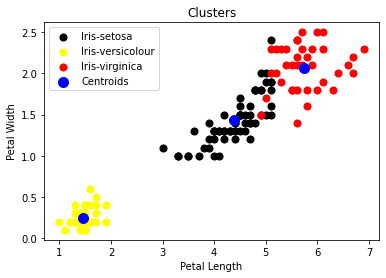

In [33]:
plt.scatter(x[pred_mean == 0, 2], x[pred_mean == 0, 3], s = 50, c = 'black', label = 'Iris-setosa')
plt.scatter(x[pred_mean == 1, 2], x[pred_mean == 1, 3], s = 50, c = 'yellow', label = 'Iris-versicolour')
plt.scatter(x[pred_mean == 2, 2], x[pred_mean == 2, 3], s = 50, c = 'red', label = 'Iris-virginica')
plt.scatter(kmeans.cluster_centers_[:, 2], kmeans.cluster_centers_[:, 3], s = 100, c = 'blue', label = 'Centroids')
plt.title('Clusters')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.legend()
plt.show()
